In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [34]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23',)

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
one_year_ago

datetime.date(2016, 8, 23)

In [42]:
# Perform a query to retrieve the data and precipitation scores
year_precip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()
year_precip

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [52]:

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(year_precip, columns=['Date', 'Precipitation'])
precip_df.set_index('Date', inplace=True)
# Sort the dataframe by date
precip_df.sort_index(inplace = True)
precip_df




,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


Text(0, 0.5, 'Inches')

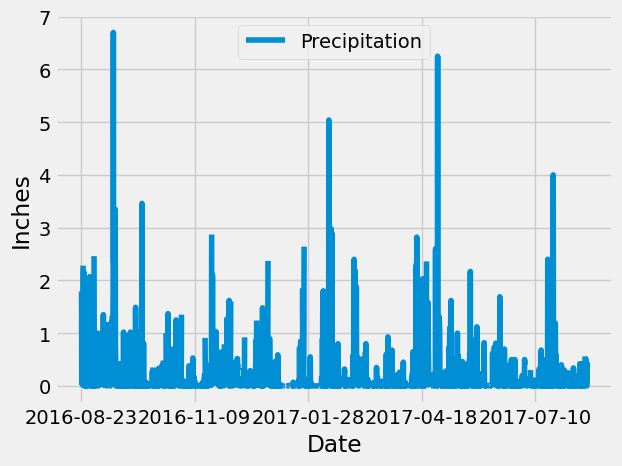

In [58]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot()
plt.xlabel("Date")
plt.ylabel("Inches")

In [59]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [69]:
# Design a query to calculate the total number of stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [84]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_rows= [Measurement.station, func.count(Measurement.station)]

active = session.query(*most_rows).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [95]:
most_active = session.query(*most_rows).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()
most_active_station = most_active.station
most_active_station

'USC00519281'

In [97]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp = [
        func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs)]
active_temp = session.query(*temp).\
    filter(Measurement.station == most_active_station).all()
active_temp

[(54.0, 85.0, 71.66378066378067)]

In [115]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
year_temp = session.query(Measurement.tobs).\
    filter(Measurement.date >= one_year_ago).\
    filter(Measurement.station == most_active_station).all()
year_temp

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


In [117]:
temp_array = np.ravel(year_temp)
temp_array

array([77., 77., 80., 80., 75., 73., 78., 77., 78., 80., 80., 78., 78.,
       78., 73., 74., 80., 79., 77., 80., 76., 79., 75., 79., 78., 79.,
       78., 78., 76., 74., 77., 78., 79., 79., 77., 80., 78., 78., 78.,
       77., 79., 79., 79., 79., 75., 76., 73., 72., 71., 77., 79., 78.,
       79., 77., 79., 77., 78., 78., 78., 78., 77., 74., 75., 76., 73.,
       76., 74., 77., 76., 76., 74., 75., 75., 75., 75., 71., 63., 70.,
       68., 67., 77., 74., 77., 76., 76., 75., 76., 75., 73., 75., 73.,
       75., 74., 75., 74., 75., 73., 75., 73., 73., 74., 70., 72., 70.,
       67., 67., 69., 70., 68., 69., 69., 66., 65., 68., 62., 75., 70.,
       69., 76., 76., 74., 73., 71., 74., 74., 72., 71., 72., 74., 69.,
       67., 72., 70., 64., 63., 63., 62., 70., 70., 62., 62., 63., 65.,
       69., 77., 70., 74., 69., 72., 71., 69., 71., 71., 72., 72., 69.,
       70., 66., 65., 69., 68., 68., 68., 59., 60., 70., 73., 75., 64.,
       59., 59., 62., 68., 70., 73., 79., 75., 65., 70., 74., 70

Text(0.5, 0, 'Temperature')

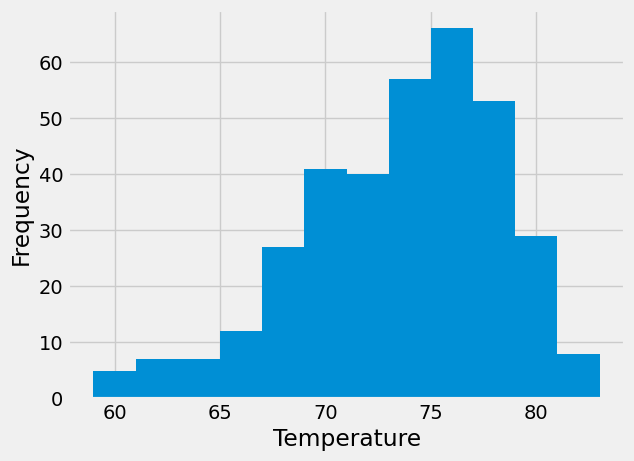

In [120]:
#Plot the results as a histogram
plt.hist(temp_array,bins=12)
plt.ylabel("Frequency")
plt.xlabel("Temperature")


# Close Session

In [121]:
# Close Session
session.close()